In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data_credits =pd.read_csv("dataset/credits.csv");
data_credits.head()
data_moviemetadata=pd.read_csv("dataset/movies_metadata.csv");
data_keywords=pd.read_csv("dataset/keywords.csv");
data_links=pd.read_csv("dataset/links.csv");
data_moviemetadata.head()

#Loading all the datasets

C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\3723107444.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_moviemetadata=pd.read_csv("dataset/movies_metadata.csv");


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
data_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [4]:
data_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [5]:
data_links.rename(columns={'movieId': 'id'}, inplace=True)

In [6]:
data_moviemetadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:

data_moviemetadata = data_moviemetadata[data_moviemetadata['id'].astype(str).str.isdigit()]
data_moviemetadata['id'] = data_moviemetadata['id'].astype(int)

In [8]:
df = pd.merge(data_credits, data_moviemetadata, on='id', how='left')
df = pd.merge(df, data_keywords, on='id', how='left')


In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   46628 non-null  object 
 1   crew                   46628 non-null  object 
 2   id                     46628 non-null  int64  
 3   adult                  46628 non-null  object 
 4   belongs_to_collection  4574 non-null   object 
 5   budget                 46628 non-null  object 
 6   genres                 46628 non-null  object 
 7   homepage               8009 non-null   object 
 8   imdb_id                46611 non-null  object 
 9   original_language      46617 non-null  object 
 10  original_title         46628 non-null  object 
 11  overview               45633 non-null  object 
 12  popularity             46624 non-null  object 
 13  poster_path            46229 non-null  object 
 14  production_companies   46624 non-null  object 
 15  pr

In [10]:
df.head()

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [11]:
df = df.drop(["poster_path","video", "spoken_languages","imdb_id", "overview", "tagline","homepage","adult"], axis=1)
# Deleting these columns as they are completely unrelated


In [12]:
df = df.drop_duplicates(keep='first') # removes the duplicates from existing dataframe

In [13]:
df.isna().sum()

cast                         0
crew                         0
id                           0
belongs_to_collection    40969
budget                       0
genres                       0
original_language           11
original_title               0
popularity                   3
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
status                      84
title                        3
vote_average                 3
vote_count                   3
keywords                     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45462 entries, 0 to 46627
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cast                   45462 non-null  object 
 1   crew                   45462 non-null  object 
 2   id                     45462 non-null  int64  
 3   belongs_to_collection  4493 non-null   object 
 4   budget                 45462 non-null  object 
 5   genres                 45462 non-null  object 
 6   original_language      45451 non-null  object 
 7   original_title         45462 non-null  object 
 8   popularity             45459 non-null  object 
 9   production_companies   45459 non-null  object 
 10  production_countries   45459 non-null  object 
 11  release_date           45375 non-null  object 
 12  revenue                45459 non-null  float64
 13  runtime                45202 non-null  float64
 14  status                 45378 non-null  object 
 15  title  

In [15]:
import pandas as pd
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year


C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\3574111400.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45462 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cast                   45462 non-null  object        
 1   crew                   45462 non-null  object        
 2   id                     45462 non-null  int64         
 3   belongs_to_collection  4493 non-null   object        
 4   budget                 45462 non-null  object        
 5   genres                 45462 non-null  object        
 6   original_language      45451 non-null  object        
 7   original_title         45462 non-null  object        
 8   popularity             45459 non-null  object        
 9   production_companies   45459 non-null  object        
 10  production_countries   45459 non-null  object        
 11  release_date           45294 non-null  datetime64[ns]
 12  revenue                45459 non-null  float64       
 13  runtim

In [17]:
df.dropna(subset=["title"], inplace=True)
df["popularity"] =pd.to_numeric(df['popularity'],errors='coerce',downcast="float")
df["id"] =pd.to_numeric(df['id'], errors='coerce',downcast="integer")
df["budget"] =pd.to_numeric(df['budget'], errors='coerce',downcast="float")

# Converting object values into numeric values for easy visualization

In [18]:
df.isna().sum()

cast                         0
crew                         0
id                           0
belongs_to_collection    40967
budget                       0
genres                       0
original_language           11
original_title               0
popularity                   0
production_companies         0
production_countries         0
release_date               165
revenue                      0
runtime                    257
status                      81
title                        0
vote_average                 0
vote_count                   0
keywords                     0
release_year               165
dtype: int64

In [19]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna("None")
df['belongs_to_collection'] = (df['belongs_to_collection'] != "None").astype(int)
df["status"].fillna(df["status"].value_counts().idxmax(), inplace=True)
df["runtime"] = df["runtime"].replace(0, np.nan)
df["runtime"].fillna(df["runtime"].mean(), inplace=True)

In [20]:
df.isna().sum()

cast                       0
crew                       0
id                         0
belongs_to_collection      0
budget                     0
genres                     0
original_language         11
original_title             0
popularity                 0
production_companies       0
production_countries       0
release_date             165
revenue                    0
runtime                    0
status                     0
title                      0
vote_average               0
vote_count                 0
keywords                   0
release_year             165
dtype: int64

In [21]:
df.dropna(subset=["release_date"],inplace=True)
df.dropna(subset=["original_language"],inplace=True)

In [22]:
from ast import literal_eval
def json_conversion(value, wanted="name"):
    value=literal_eval(value)
    if value==[] or (isinstance(value, float) and value.isna()): return np.nan
    ans=[]
    count=0
    for element in value:
        if count < 3:
            ans.append(element[wanted])
            count+= 1
        else:break
    return ans[:3]

#function to read the json data of the dataset

In [23]:
print(sum(df['budget']==0),sum(df['revenue']==0))

36393 37876


In [24]:
df['budget'] = df['budget'].replace(0,np.nan)
df['revenue'] = df['revenue'].replace(0,np.nan)

In [25]:
df['popularity_quartile'] = pd.qcut(df['popularity'], 4, labels=False)
df['budget'] = df.groupby('popularity_quartile')['budget'].transform(lambda x: x.fillna(x.median()))
df['revenue'] = df.groupby('popularity_quartile')['revenue'].transform(lambda x: x.fillna(x.median()))
df["profit"] = df["revenue"] - df["budget"]


In [26]:
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result: 
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i) 
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

In [27]:
df.isnull().sum()

cast                     0
crew                     0
id                       0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
original_title           0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
title                    0
vote_average             0
vote_count               0
keywords                 0
release_year             0
popularity_quartile      0
profit                   0
dtype: int64

In [28]:
df[['genres']] = df[['genres']].applymap(json_conversion)

<Axes: xlabel='genres'>

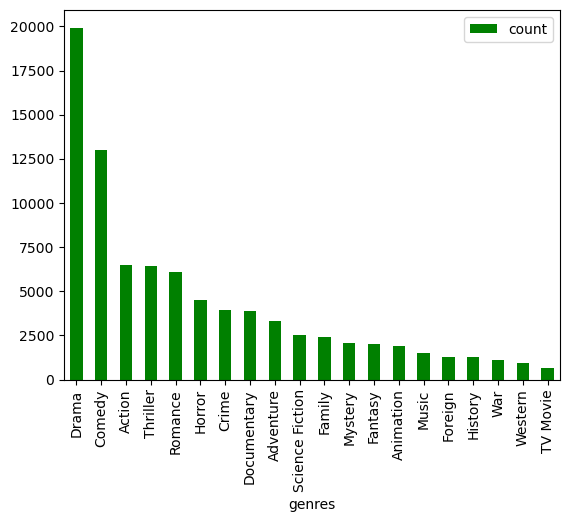

In [29]:
genres_ocr = list_counter(df["genres"].values, log=False)
genres = pd.DataFrame.from_records(genres_ocr, columns=["genres", "count"])
genres.plot(kind = 'bar', x="genres",color="green")

In [30]:
def fill_na_with_list(cell, data):
    if isinstance(cell, float):
        return data
    else:
        return cell

In [31]:
df[['genres']] = df[['genres']].applymap(lambda row:
                                        fill_na_with_list(row, [genres_ocr[0][0]]))

In [32]:
df.isnull().sum()

cast                     0
crew                     0
id                       0
belongs_to_collection    0
budget                   0
genres                   0
original_language        0
original_title           0
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
status                   0
title                    0
vote_average             0
vote_count               0
keywords                 0
release_year             0
popularity_quartile      0
profit                   0
dtype: int64

In [33]:
df[['production_countries']] = df[['production_countries']].applymap(lambda row:
                                                                     json_conversion(row, "iso_3166_1"))
df[['production_companies']] = df[['production_companies']].applymap(json_conversion)

In [34]:
companies_occur = list_counter(df["production_companies"].values, log=False)

<Axes: xlabel='companies'>

<Figure size 1200x800 with 0 Axes>

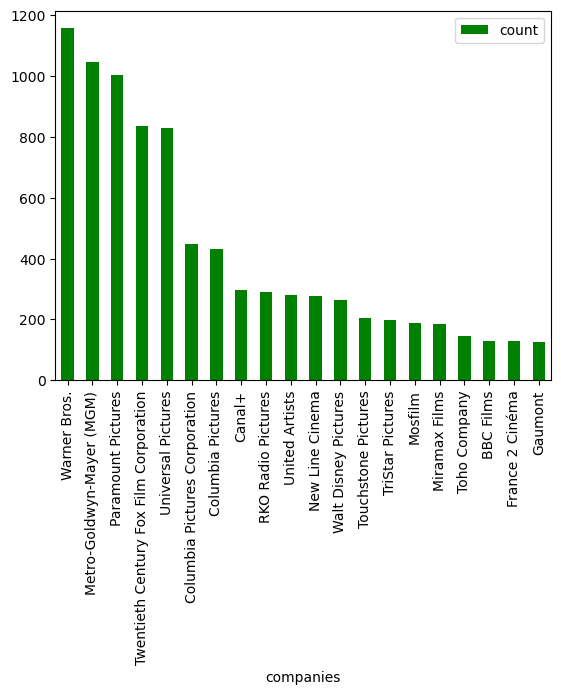

In [35]:
plt.figure(figsize=(12, 8))
companies_occur=list_counter(df["production_companies"].values, log=False)
companies = pd.DataFrame.from_records(companies_occur, columns=["companies", "count"])
companies.head(20).plot(kind = 'bar', x="companies",color="green")

In [36]:
df[['production_companies']] = df[['production_companies']].applymap(lambda row: 
                                        fill_na_with_list(row, [companies_occur[0][0]]))

In [37]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45285 entries, 0 to 46627
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cast                   45285 non-null  object        
 1   crew                   45285 non-null  object        
 2   id                     45285 non-null  int32         
 3   belongs_to_collection  45285 non-null  int32         
 4   budget                 45285 non-null  float64       
 5   genres                 45285 non-null  object        
 6   original_language      45285 non-null  object        
 7   original_title         45285 non-null  object        
 8   popularity             45285 non-null  float32       
 9   production_companies   45285 non-null  object        
 10  production_countries   39086 non-null  object        
 11  release_date           45285 non-null  datetime64[ns]
 12  revenue                45285 non-null  float64       
 13  runtim

In [38]:
df["profit"] = df["revenue"] - df["budget"]

In [39]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.75)
def weighted_rating(data):
    v = data['vote_count'] + 1 # added +1
    R = data['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

df['rating'] = df.apply(weighted_rating, axis=1)

In [40]:
df["keywords"] = df[['keywords']].applymap(json_conversion)

In [41]:
df.isna().sum()

cast                         0
crew                         0
id                           0
belongs_to_collection        0
budget                       0
genres                       0
original_language            0
original_title               0
popularity                   0
production_companies         0
production_countries      6199
release_date                 0
revenue                      0
runtime                      0
status                       0
title                        0
vote_average                 0
vote_count                   0
keywords                 14257
release_year                 0
popularity_quartile          0
profit                       0
rating                       0
dtype: int64

In [42]:
keywords_occur=list_counter(df["keywords"].values, log=False)

In [43]:
df[['keywords']] = df[['keywords']].applymap(lambda row: 
                                        fill_na_with_list(row, [keywords_occur[0][0]]))

In [44]:
df['keywords']

0                                     [jealousy, toy, boy]
1        [board game, disappearance, based on children'...
2             [fishing, best friend, duringcreditsstinger]
3        [based on novel, interracial relationship, sin...
4                       [baby, midlife crisis, confidence]
                               ...                        
46622                                     [woman director]
46624                                [artist, play, pinoy]
46625                                     [woman director]
46626                                     [woman director]
46627                                     [woman director]
Name: keywords, Length: 45285, dtype: object

In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


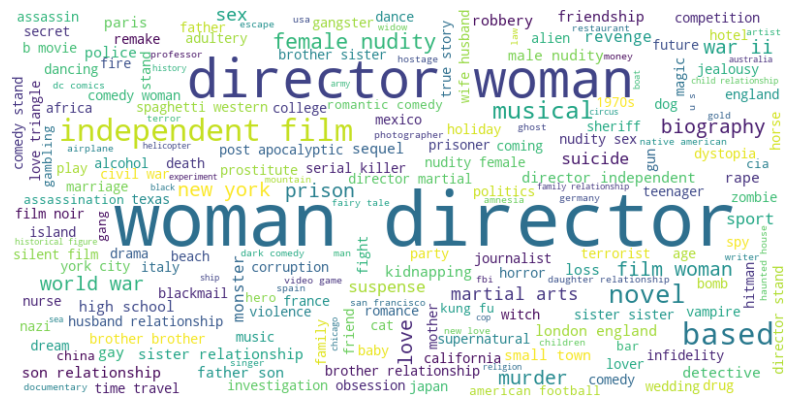

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

all_keywords = ' '.join(df['keywords'].explode().dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [47]:
def get_director(x):
    x = literal_eval(x)
    for i in x:
        if i == "[]" or isinstance(i, float):
            return np.nan
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [48]:
df['director'] = df['crew'].apply(get_director)
df.drop(["crew"], axis=1, inplace=True)

<Axes: >

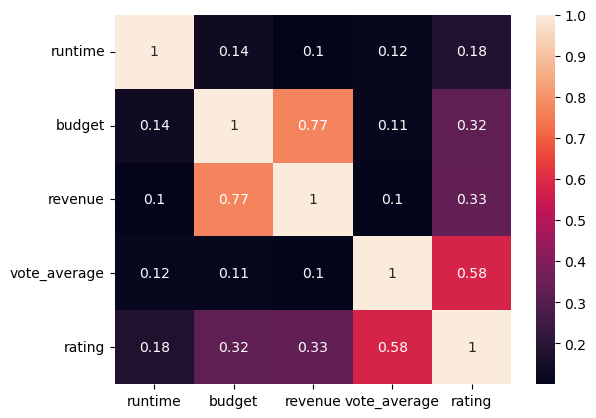

In [49]:
Source = df[['runtime', 'budget', 'revenue','vote_average','rating']]
source_corr = Source.corr()
sns.heatmap(source_corr, xticklabels = source_corr.columns, yticklabels = source_corr.columns, annot = True)

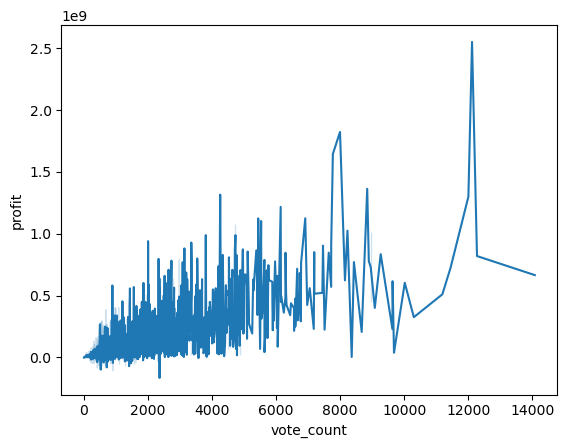

In [50]:
sns.lineplot(x="vote_count", y="profit", data=df[["profit", "vote_count"]])
plt.show()


In [51]:
df.sort_values('rating', ascending=False)[["title", "genres", "profit","popularity", "rating"]].head()

,title,genres,profit,popularity,rating
10357,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",86800000.0,34.457024,8.911971
314,The Shawshank Redemption,"[Drama, Crime]",3341469.0,51.645405,8.486838
837,The Godfather,"[Drama, Crime]",239066411.0,41.109264,8.481768
41402,Your Name.,"[Romance, Animation, Drama]",338798270.0,34.461250,8.396274
12541,The Dark Knight,"[Drama, Action, Crime]",819558444.0,123.167259,8.291574


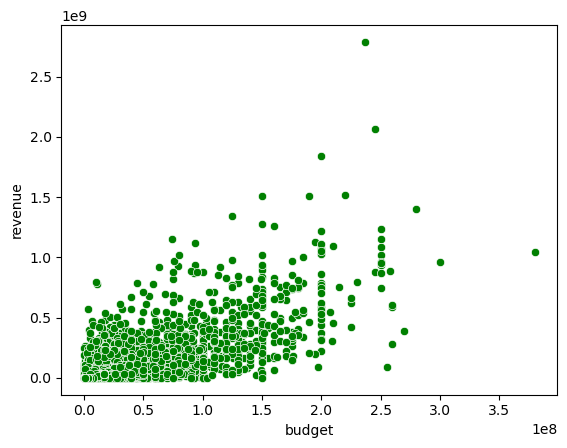

In [52]:
g = sns.scatterplot(x="budget", y="revenue", data=df[["budget", "revenue"]],color='green')

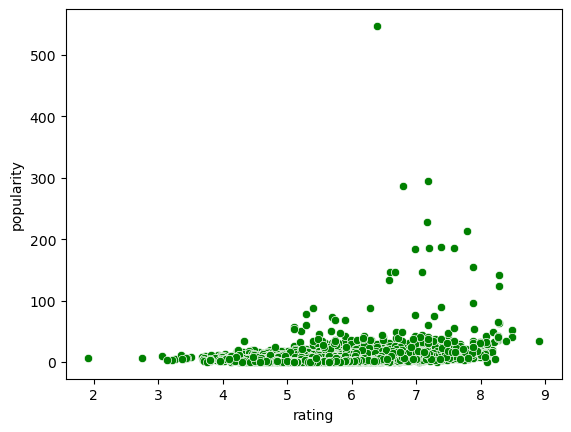

In [53]:
g = sns.scatterplot(x="rating", y="popularity", data=df[["popularity", "rating"]],color='green')

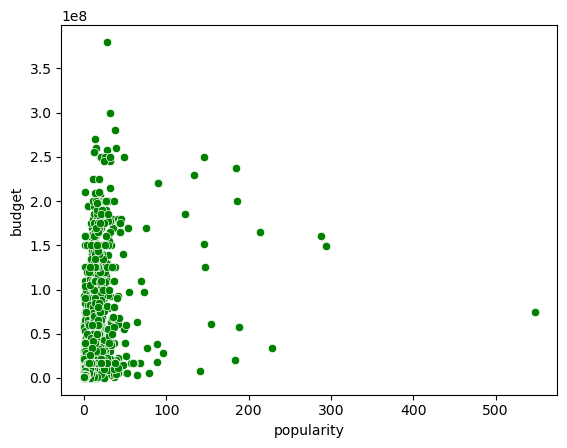

In [54]:
g = sns.scatterplot(x="popularity", y="budget", data=df[["popularity", "budget"]],color='green')

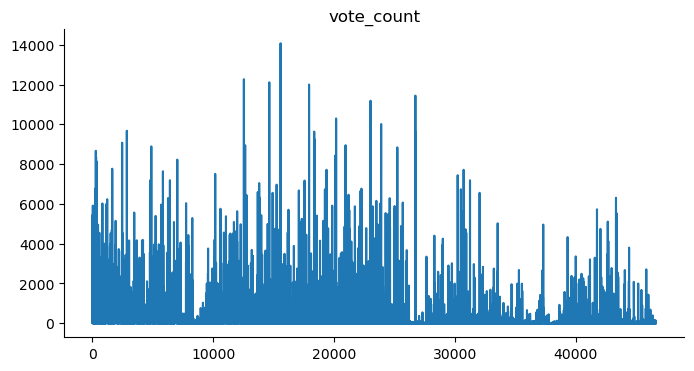

In [55]:
from matplotlib import pyplot as plt
df['vote_count'].plot(kind='line', figsize=(8, 4), title='vote_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [56]:
df_genres = df[["genres", "popularity", "budget", "revenue", "vote_count", "rating"]]

In [57]:
genres = list_counter(df_genres["genres"].values, log=False)

In [58]:
def categorize_rating(rating):
    if rating < 5.0:
        return 'Low'
    elif 5.0 <= rating <= 7.0:
        return 'Medium'
    else:
        return 'High'
df_exploded = df.explode('genres')
df_exploded['rating_category'] = df_exploded['rating'].apply(categorize_rating)


In [59]:
genre_sentiment = df_exploded.groupby('genres')['rating_category'].value_counts(normalize=True).unstack().fillna(0) * 100
print(genre_sentiment)

rating_category      High        Low     Medium
genres                                         
Action           3.163092  10.307051  86.529857
Adventure        5.467583   9.291903  85.240514
Animation        7.124149   1.361970  91.513882
Comedy           2.187307   5.637708  92.174985
Crime            5.017650   3.580434  91.401916
Documentary      1.547988   1.135191  97.316821
Drama            3.646394   2.587908  93.765698
Family           4.021785   5.781315  90.196900
Fantasy          5.107661   9.914872  84.977466
Foreign          0.000000   1.836266  98.163734
History          6.245059   1.422925  92.332016
Horror           1.436782  19.849691  78.713528
Music            2.733333   1.866667  95.400000
Mystery          4.484733   5.868321  89.646947
Romance          2.774130   3.529219  93.696651
Science Fiction  3.705179  18.087649  78.207171
TV Movie         0.447094   9.239940  90.312966
Thriller         3.491272  10.427057  86.081671
War              5.467372   1.675485  92

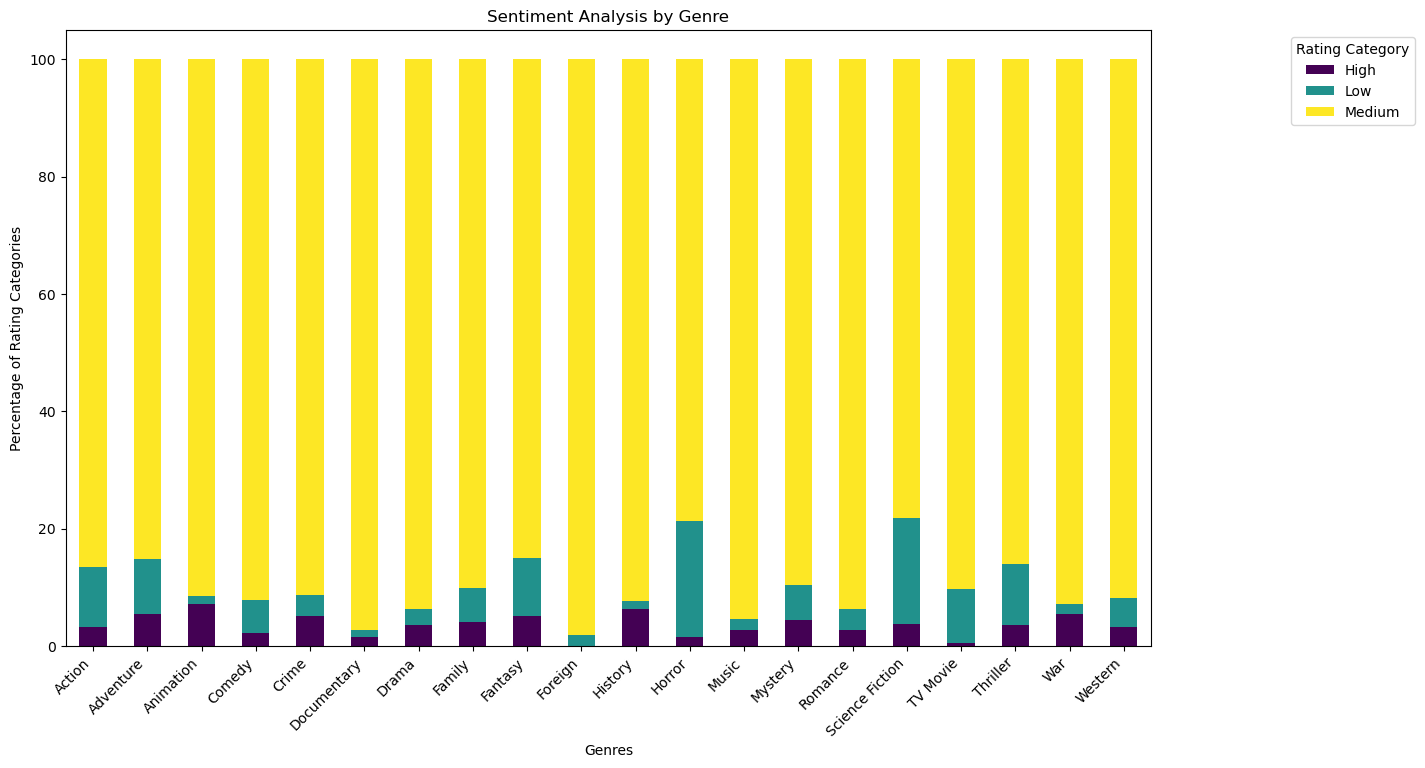

In [60]:
genre_sentiment.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Sentiment Analysis by Genre')
plt.xlabel('Genres')
plt.ylabel('Percentage of Rating Categories')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating Category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


In [61]:
def list_to_col(data, col_name, col_list, limiter = 9999):
    counter = 0
    selected_items = set()
    for item in col_list:
        if counter >= limiter:
            break
        item = item[0]
        data[item] = 0
        selected_items.add(item)
        counter += 1

    for index, row in data.iterrows():
        for item in row[col_name]:
            if item in selected_items:
                data.at[index, item] = 1
    data.drop([col_name], axis=1, inplace=True)
    return data

In [62]:
df_genres = list_to_col(df_genres, "genres", genres)
df_genres

C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\997780888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[item] = 0
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\997780888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[item] = 0
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\997780888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,popularity,budget,revenue,vote_count,rating,Drama,Comedy,Action,Thriller,Romance,...,Family,Mystery,Fantasy,Animation,Music,Foreign,History,War,Western,TV Movie
0,21.946943,30000000.0,373554033.0,5415.0,7.684721,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,17.015539,65000000.0,262797249.0,2413.0,6.877096,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,11.712900,16500000.0,29506464.0,92.0,6.165607,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.859495,16000000.0,81452156.0,34.0,5.681625,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.387519,16500000.0,76578911.0,173.0,5.626597,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46622,5.683753,16500000.0,29506464.0,26.0,5.449707,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
46624,0.178241,500000.0,296482.0,3.0,5.645581,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46625,0.903007,1200000.0,964206.0,6.0,5.003222,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
46626,0.003503,500000.0,296482.0,0.0,5.100917,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
def binary_mean_dataset_generator(data, col_list, limiter=9999):
    counter = 0
    items = []
    for item in col_list:
        if counter >= limiter:
            break
        items.append(item[0])
        counter += 1
    rows = []
    for item in items:
        # Exclude non-numeric values before calculating the mean
        numeric_data = data[data[item] == 1].select_dtypes(include=['int', 'float'])
        value = numeric_data.mean()
        rows.append([item, value[0], value[1], value[2], value[3], value[4]])

    df_genres_means = pd.DataFrame(rows, columns=["type", "popularity", "budget", "revenue","vote_count", "rating"])
    return df_genres_means

In [64]:
df_means_genres = binary_mean_dataset_generator(df_genres, genres)
df_means_genres

,type,popularity,budget,revenue,vote_count,rating
0,Drama,2.708983,6.110323e+06,1.151961e+07,86.313823,5.612916
1,Comedy,3.124413,7.881638e+06,1.706941e+07,104.826633,5.562098
2,Action,4.738849,1.520252e+07,3.662466e+07,259.245950,5.560403
3,Thriller,4.313463,1.017200e+07,2.210492e+07,177.409913,5.553928
4,Romance,3.020374,6.894864e+06,1.466681e+07,89.424655,5.601037
5,Horror,3.535618,6.202895e+06,1.330509e+07,100.843059,5.370171
6,Crime,4.075647,9.550478e+06,1.969073e+07,174.455875,5.699356
7,Documentary,0.950845,1.913009e+06,2.390802e+06,12.840557,5.544630
8,Adventure,5.949727,2.201146e+07,6.257805e+07,402.445474,5.661973
9,Science Fiction,4.696429,1.377874e+07,3.566609e+07,313.419124,5.482511


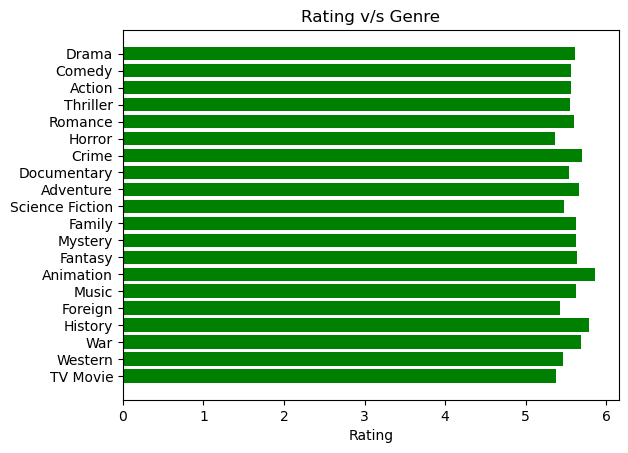

In [65]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(df_means_genres))
ax.barh(y_pos, df_means_genres['rating'], align='center',color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_means_genres['type'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rating')
ax.set_title('Rating v/s Genre')
plt.show()

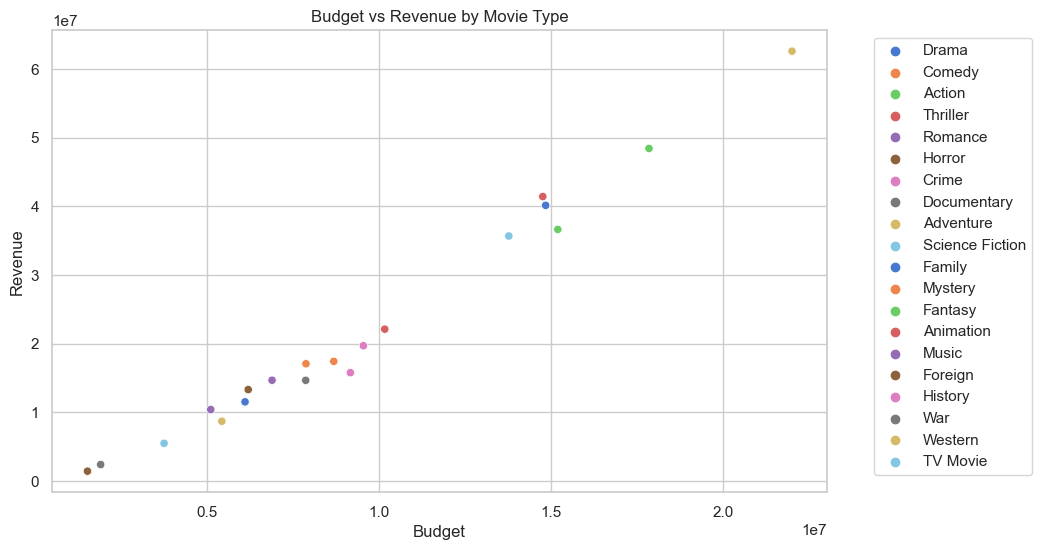

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="budget", y="revenue", hue="type", data=df_means_genres, palette="muted")

plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue by Movie Type")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [67]:
def convert_str(data, col_name, col_list, limiter = 9999):
    counter = 0
    selected = set()
    for item in col_list:
        if counter >= limiter:
            break
        data[item] = 0
        selected.add(item)
        counter += 1
    for index, row in data.iterrows():
        item = row[col_name]
        if(item in selected):
            data.at[index, item] = 1
    data.drop([col_name], axis=1, inplace=True)
    return data

In [68]:
def mean_generator(data, col_list, limiter=9999):
    counter = 0
    items = []
    for item in col_list:
        if counter >= limiter:
            break
        items.append(item)
        counter += 1
    rows = []
    for item in items:
        numeric_data = data[data[item] == 1].select_dtypes(include=['int', 'float'])
        value = numeric_data.mean()
        rows.append([item, value[0], value[1], value[2], value[3], value[4]])
    df_genres_means = pd.DataFrame(rows, columns=["type", "popularity", "budget", "revenue","vote_count", "rating"])
    return df_genres_means


In [69]:
df_dir= df[["director", "popularity", "budget", "revenue", "vote_count", "rating"]]
df_dir.dropna(subset=["director"], inplace=True)
directors = df_dir["director"].value_counts()
directors = directors.index.to_list()

C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\588203471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir.dropna(subset=["director"], inplace=True)


In [70]:
df_dir = convert_str(df_dir, "director", directors[:15], 15)
df_means_dir = mean_generator(df_dir, directors[:15])
df_means_dir 

C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\711248818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[item] = 0
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\711248818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[item] = 0
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\711248818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,type,popularity,budget,revenue,vote_count,rating
0,John Ford,3.046887,4.256324e+06,8.142695e+06,33.484848,5.715028
1,Michael Curtiz,2.107353,3.196911e+06,4.892643e+06,38.092308,5.557330
2,Werner Herzog,2.316761,4.560704e+06,6.853382e+06,46.592593,5.909489
3,Alfred Hitchcock,6.498370,5.742870e+06,1.436098e+07,240.981132,6.372954
4,Woody Allen,7.673525,1.312653e+07,3.083838e+07,316.571429,6.452009
5,Jean-Luc Godard,2.137694,2.398170e+06,4.401492e+06,31.617021,5.828639
6,Sidney Lumet,3.903939,6.255435e+06,1.021471e+07,114.934783,5.889064
7,Charlie Chaplin,2.822399,3.533477e+06,6.107225e+06,85.181818,5.997069
8,Raoul Walsh,1.779327,3.109585e+06,4.841414e+06,13.558140,5.530199
9,William A. Wellman,1.764292,3.261914e+06,5.407110e+06,12.476190,5.467213


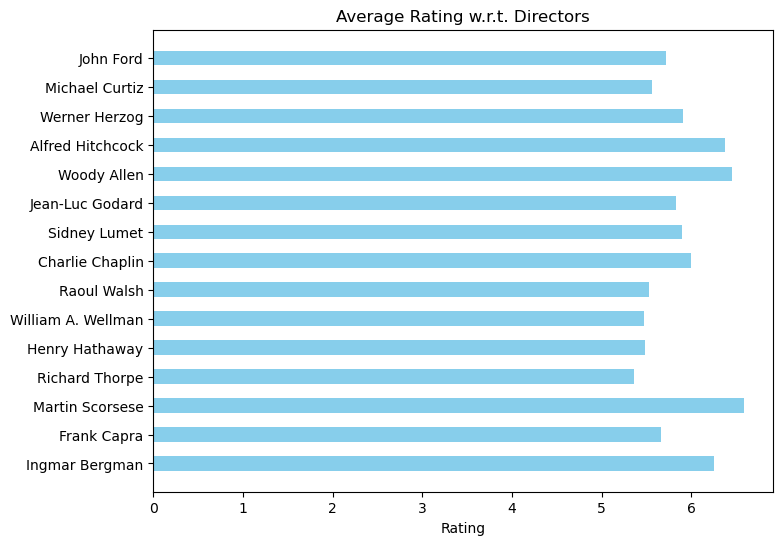

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 6))

y_pos = np.arange(len(df_means_dir))
ax.barh(y_pos, df_means_dir['rating'], height=0.5, align='center', color='skyblue')  # Adjust color if needed
ax.set_yticks(y_pos)
ax.set_yticklabels(df_means_dir['type'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rating')
ax.set_title('Average Rating w.r.t. Directors')

plt.show()


In [72]:
df_key = df[["keywords", "popularity", "budget", "revenue", "vote_count", "rating"]]
df_key.dropna(subset=["keywords"], inplace=True)
keywords = list_counter(df_key["keywords"].values, 20, log=False)
df_key = list_to_col(df_key, "keywords", keywords)
df_means_key = binary_mean_dataset_generator(df_key, keywords, 20)
df_means_key

C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\2697471918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key.dropna(subset=["keywords"], inplace=True)
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\997780888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[item] = 0
C:\Users\ujwal\AppData\Local\Temp\ipykernel_8168\997780888.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,type,popularity,budget,revenue,vote_count,rating
0,woman director,1.195419,2.666246e+06,3.399098e+06,14.423117,5.381543
1,independent film,2.298188,4.270392e+06,5.628358e+06,27.735140,5.501925
2,based on novel,6.124438,1.686791e+07,4.081346e+07,354.547908,5.848720
3,musical,2.599241,6.595970e+06,1.529772e+07,71.271722,5.572367
4,sex,4.469583,8.329878e+06,1.672242e+07,120.069805,5.543150
5,female nudity,3.723862,6.503065e+06,1.279004e+07,84.014599,5.440461
6,biography,3.185127,7.742352e+06,1.426422e+07,117.846774,5.771555
7,murder,2.862049,5.787688e+06,9.784985e+06,61.329854,5.470171
8,sport,3.318458,8.150788e+06,1.410136e+07,87.287736,5.585317
9,prison,5.388776,1.234941e+07,2.661253e+07,221.279539,5.938360


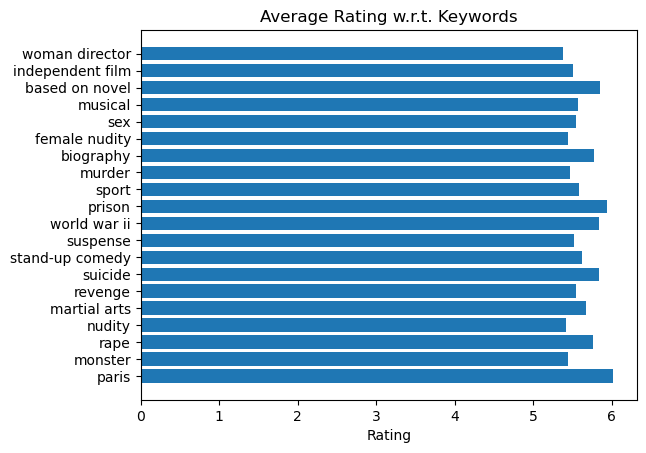

In [73]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(df_means_key))
ax.barh(y_pos, df_means_key['rating'], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_means_key['type'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rating')
ax.set_title('Average Rating w.r.t. Keywords')
plt.show()

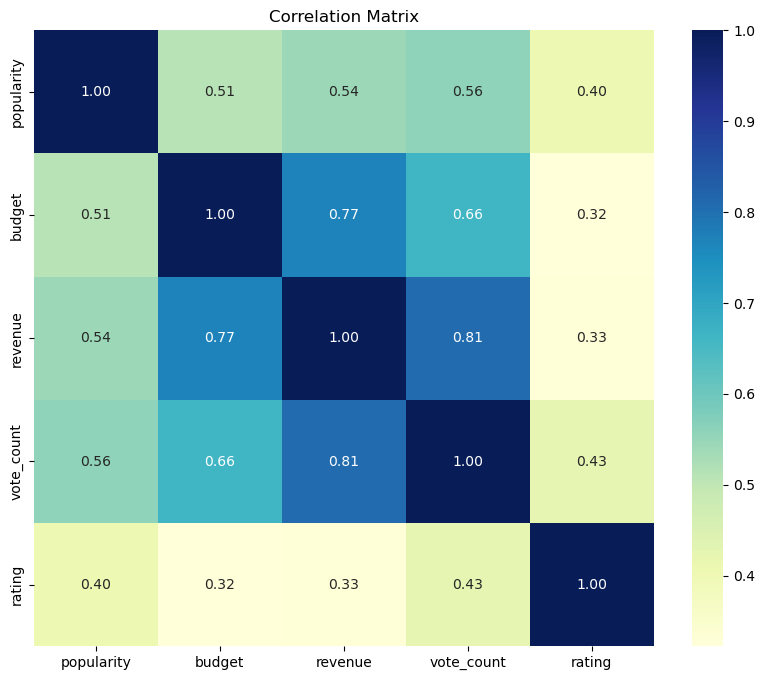

In [74]:
corr_matrix = df_key[["popularity", "budget", "revenue", "vote_count", "rating"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


In [75]:
df_cast_dir = df[["director", "cast"]].dropna()
df_cast_dir.head()

,director,cast
0,John Lasseter,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,Joe Johnston,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,Howard Deutch,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,Forest Whitaker,"[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,Charles Shyer,"[{'cast_id': 1, 'character': 'George Banks', '..."


In [76]:
df['release_month'] = df['release_date'].dt.month

In [77]:
df["cast"] = df[['cast']].applymap(json_conversion)

In [78]:
df['actor_1'] = df['cast'].apply(lambda x: x[0] if isinstance(x, list) and len(x) >= 1 else np.nan)
df['actor_2'] = df['cast'].apply(lambda x: x[1] if isinstance(x, list) and len(x) >= 2 else np.nan)
df['actor_3'] = df['cast'].apply(lambda x: x[2] if isinstance(x, list) and len(x) >= 3 else np.nan)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'belongs_to_collection'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'popularity_quartile'}>,
        <Axes: title={'center': 'profit'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'release_month'}>, <Axes: >, <Axes: >]],
      dtype=object)

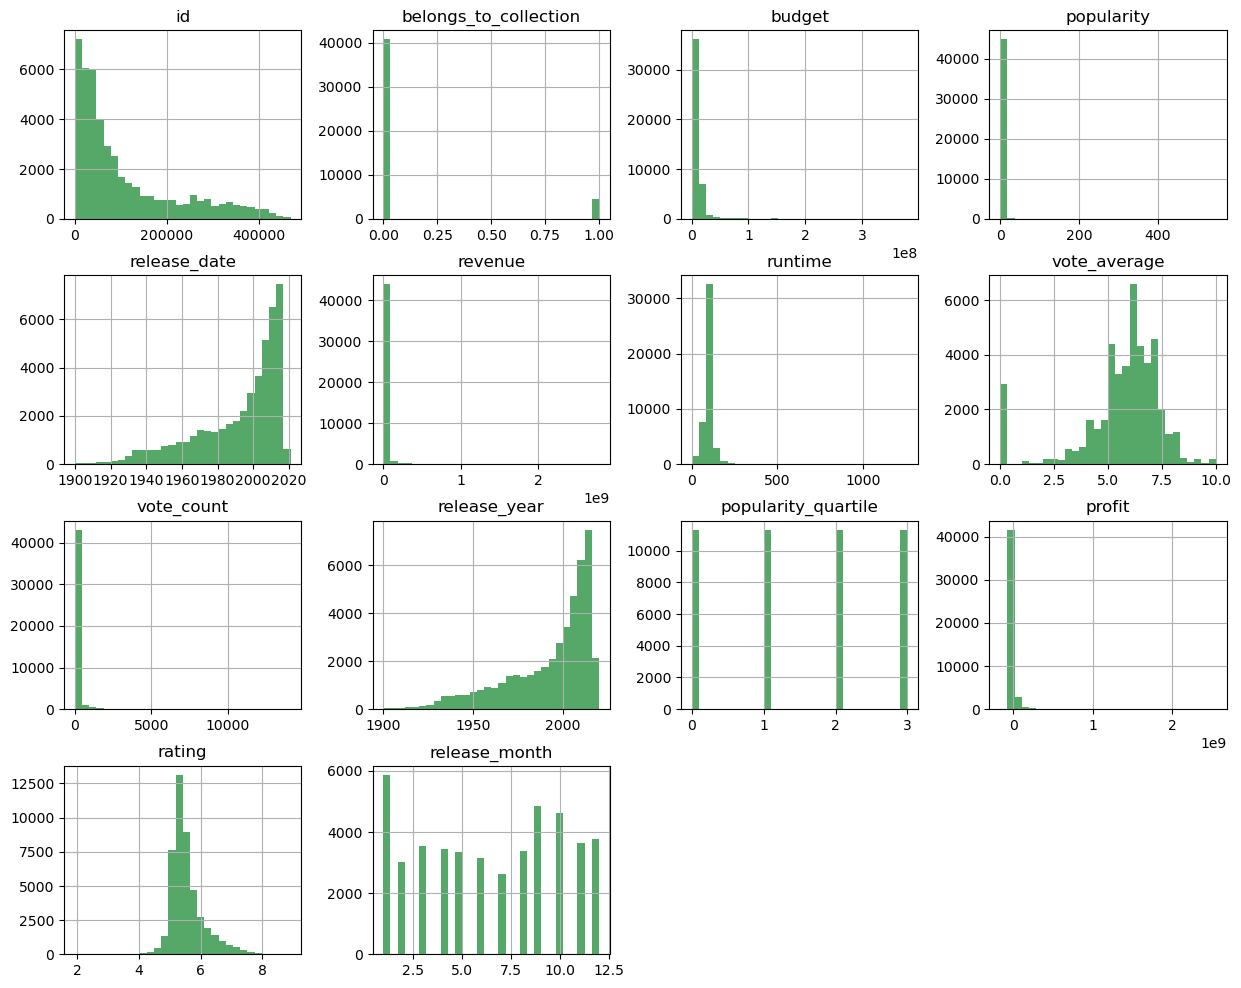

In [79]:
df.hist(bins=30,figsize=(15,12),color='g')

In [80]:
director_frequency = df['director'].value_counts()
df['director_frequency'] = df['director'].map(director_frequency)
director_avg_rating = df.groupby('director')['vote_average'].mean()
df['director_avg_rating'] = df['director'].map(director_avg_rating)
print(df[['director', 'director_frequency', 'director_avg_rating']].head())
df = df.dropna(subset=['director'])

#creating new columns a.k.a feature engineering

          director  director_frequency  director_avg_rating
0    John Lasseter                10.0             6.720000
1     Joe Johnston                10.0             6.200000
2    Howard Deutch                11.0             5.963636
3  Forest Whitaker                 4.0             5.075000
4    Charles Shyer                 7.0             5.671429


In [81]:
actor_frequency = df['actor_1'].value_counts()
df['actor_1_frequency'] = df['actor_1'].map(actor_frequency)
actor_1_avg_rating = df.groupby('actor_1')['vote_average'].mean()
df['actor_1_avg_rating'] = df['actor_1'].map(actor_1_avg_rating)
print(df[['actor_1', 'actor_1_frequency', 'actor_1_avg_rating']].head())

           actor_1  actor_1_frequency  actor_1_avg_rating
0        Tom Hanks               42.0            6.700000
1   Robin Williams               42.0            6.180952
2   Walter Matthau               24.0            6.500000
3  Whitney Houston                4.0            6.050000
4     Steve Martin               30.0            6.053333


In [82]:
actor_frequency = df['actor_2'].value_counts()
df['actor_2_frequency'] = df['actor_2'].map(actor_frequency)
actor_2_avg_rating = df.groupby('actor_2')['vote_average'].mean()
df['actor_2_avg_rating'] = df['actor_2'].map(actor_2_avg_rating)
print(df[['actor_2', 'actor_2_frequency', 'actor_2_avg_rating']].head())

          actor_2  actor_2_frequency  actor_2_avg_rating
0       Tim Allen               10.0             6.65000
1   Jonathan Hyde                2.0             6.20000
2     Jack Lemmon               10.0             6.73000
3  Angela Bassett               10.0             5.76000
4    Diane Keaton               23.0             6.26087


In [83]:
actor_frequency = df['actor_3'].value_counts()
df['actor_3_frequency'] = df['actor_3'].map(actor_frequency)
actor_3_avg_rating = df.groupby('actor_3')['vote_average'].mean()
df['actor_3_avg_rating'] = df['actor_3'].map(actor_3_avg_rating)
print(df[['actor_3', 'actor_3_frequency', 'actor_3_avg_rating']].head())

          actor_3  actor_3_frequency  actor_3_avg_rating
0     Don Rickles                4.0            5.250000
1   Kirsten Dunst                7.0            6.728571
2     Ann-Margret                7.0            6.371429
3  Loretta Devine                6.0            4.650000
4    Martin Short                4.0            6.075000


In [84]:
for col in ['actor_1_frequency', 'actor_1_avg_rating', 'actor_2_frequency', 'actor_2_avg_rating', 'actor_3_frequency', 'actor_3_avg_rating']:
    df[col] = df[col].fillna(0)

df['actor_1'] = df['actor_1'].fillna("Unknown")
df['actor_2'] = df['actor_2'].fillna("Unknown")
df['actor_3'] = df['actor_3'].fillna("Unknown")

#Filling null values with Unknown

In [85]:
df.isna().sum()

cast                     1922
id                          0
belongs_to_collection       0
budget                      0
genres                      0
original_language           0
original_title              0
popularity                  0
production_companies        0
production_countries     5623
release_date                0
revenue                     0
runtime                     0
status                      0
title                       0
vote_average                0
vote_count                  0
keywords                    0
release_year                0
popularity_quartile         0
profit                      0
rating                      0
director                    0
release_month               0
actor_1                     0
actor_2                     0
actor_3                     0
director_frequency          0
director_avg_rating         0
actor_1_frequency           0
actor_1_avg_rating          0
actor_2_frequency           0
actor_2_avg_rating          0
actor_3_fr

In [86]:
df['production_companies']

0                                [Pixar Animation Studios]
1        [TriStar Pictures, Teitler Film, Interscope Co...
2                           [Warner Bros., Lancaster Gate]
3                 [Twentieth Century Fox Film Corporation]
4             [Sandollar Productions, Touchstone Pictures]
                               ...                        
46622    [Westdeutscher Rundfunk (WDR), Working Title F...
46624                                        [Sine Olivia]
46625                            [American World Pictures]
46626                                          [Yermoliev]
46627                                       [Warner Bros.]
Name: production_companies, Length: 44453, dtype: object

In [87]:
df['production_companies'] = df['production_companies'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

In [88]:
df['production_companies']

0                       Pixar Animation Studios
1                              TriStar Pictures
2                                  Warner Bros.
3        Twentieth Century Fox Film Corporation
4                         Sandollar Productions
                          ...                  
46622              Westdeutscher Rundfunk (WDR)
46624                               Sine Olivia
46625                   American World Pictures
46626                                 Yermoliev
46627                              Warner Bros.
Name: production_companies, Length: 44453, dtype: object

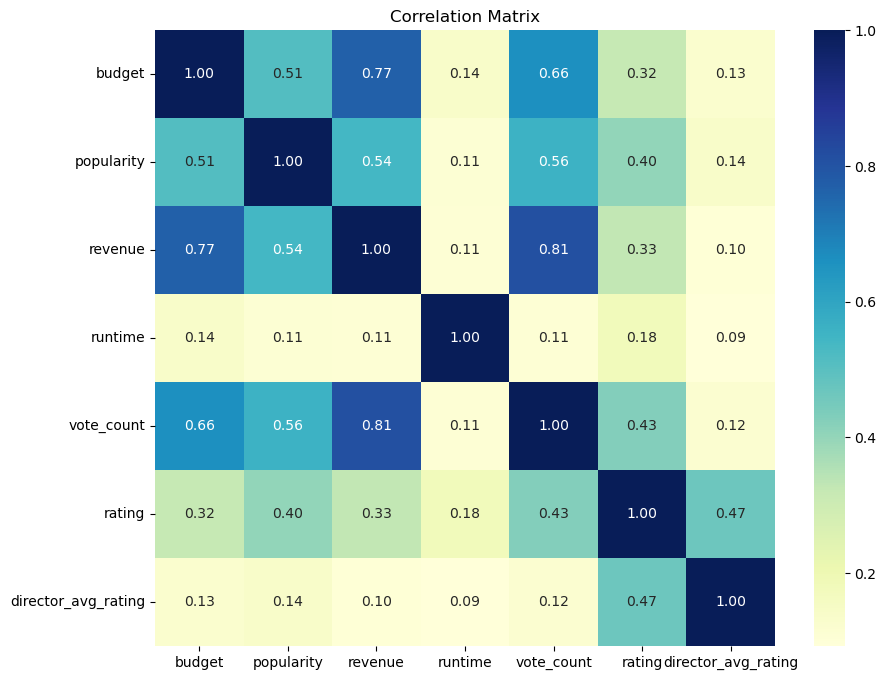

In [89]:
numeric_rows = df.select_dtypes(include='number')
corr_matrix = df[['budget','popularity','revenue','runtime','vote_count','rating','director_avg_rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()


In [90]:
df.to_csv(r"dataset\Main_Data.csv", index=False)